In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("group_9.csv")

In [3]:
print("Dataset dimension:", df.shape)
display(df.head())

Dataset dimension: (3000, 49)


duration_1  duration_2  duration_3  duration_4  duration_5  loudness_level  \
0         1.0         0.0         0.0         0.0         0.0             3.0   
1         0.0         1.0         0.0         0.0         0.0             3.0   
2         0.0         1.0         0.0         0.0         0.0             0.0   
3         1.0         0.0         0.0         0.0         0.0             1.0   
4         0.0         1.0         0.0         0.0         0.0             3.0   

   popularity_level  tempo_class  time_signature  key_mode  ...  \
0               3.0          1.0        0.221824 -0.949100  ...   
1               2.0          1.0       -2.089669  1.020640  ...   
2               3.0          1.0        0.221824  0.204605  ...   
3               3.0          1.0        0.221824 -0.076786  ...   
4               3.0          1.0       -2.089669 -1.511882  ...   

   is_instrumental  is_dance_hit  temp_zscore  resonance_factor  timbre_index  \
0              0.0           0.0    -0.128149         -1.114081      0.183527   
1              0.0           0.0     0.696314         -0.630931      0.857540   
2              0.0           0.0    -0.438474         -0.942060      0.198153   
3              0.0           0.0    -1.162765         -0.547996      0.272156   
4              0.0           0.0     0.025929         -0.214150      0.523902   

   echo_constant  distorted_movement  signal_power  target_class  \
0              1           -0.292728         0.972       class_7   
1              1           -0.154433         0.952       class_7   
2              1           -0.575080         0.913       class_7   
3              1           -0.165958         0.466       class_7   
4              1           -1.669916         0.905       class_7   

   target_regression  
0           0.796292  
1           1.110125  
2           0.616958  
3           0.347959  
4           0.930791  

[5 rows x 49 columns]

Graphic settings

In [4]:
# sns.set(style="whitegrid", context="notebook")
# plt.rcParams["figure.figsize"] = (10, 6)
sns.set(style="whitegrid")

Dataset info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   duration_1                     3000 non-null   float64
 1   duration_2                     3000 non-null   float64
 2   duration_3                     3000 non-null   float64
 3   duration_4                     3000 non-null   float64
 4   duration_5                     3000 non-null   float64
 5   loudness_level                 3000 non-null   float64
 6   popularity_level               3000 non-null   float64
 7   tempo_class                    3000 non-null   float64
 8   time_signature                 3000 non-null   float64
 9   key_mode                       3000 non-null   float64
 10  artist_song_count              3000 non-null   float64
 11  album_freq                     3000 non-null   float64
 12  movement_index                 3000 non-null   f

DESCRIPTIVE STATISTICS
 Basic statistics + skewness and curtose

In [6]:
num_desc = df.describe().T
num_desc["skew"] = df.select_dtypes(include=[np.number]).skew()
num_desc["kurtosis"] = df.select_dtypes(include=[np.number]).kurtosis()
display(num_desc.head(10))

count      mean       std       min       25%       50%  \
duration_1        3000.0  0.129667  0.335992  0.000000  0.000000  0.000000   
duration_2        3000.0  0.239333  0.426748  0.000000  0.000000  0.000000   
duration_3        3000.0  0.347667  0.476309  0.000000  0.000000  0.000000   
duration_4        3000.0  0.236333  0.424900  0.000000  0.000000  0.000000   
duration_5        3000.0  0.047000  0.211674  0.000000  0.000000  0.000000   
loudness_level    3000.0  1.646000  1.333145  0.000000  0.000000  2.000000   
popularity_level  3000.0  1.730667  1.047772  0.000000  1.000000  1.000000   
tempo_class       3000.0  1.016667  0.305101  0.000000  1.000000  1.000000   
time_signature    3000.0  0.063872  0.838877 -6.712656  0.221824  0.221824   
key_mode          3000.0  0.029570  1.005989 -1.511882 -0.920961  0.176466   

                       75%       max      skew   kurtosis  
duration_1        0.000000  1.000000  2.205886   2.867844  
duration_2        0.000000  1.000000  1.222458  -0.505934  
duration_3        1.000000  1.000000  0.640068  -1.591375  
duration_4        0.000000  1.000000  1.241904  -0.457980  
duration_5        0.000000  1.000000  4.283019  16.355159  
loudness_level    3.000000  4.000000  0.049514  -1.488613  
popularity_level  3.000000  4.000000  0.643058  -1.067581  
tempo_class       1.000000  3.000000  0.564254   8.577322  
time_signature    0.221824  2.533318 -4.879960  34.262170  
key_mode          1.020640  1.611562 -0.020314  -1.289904

UNIVARIATE ANALYSIS 
    (Distribution of individual features)

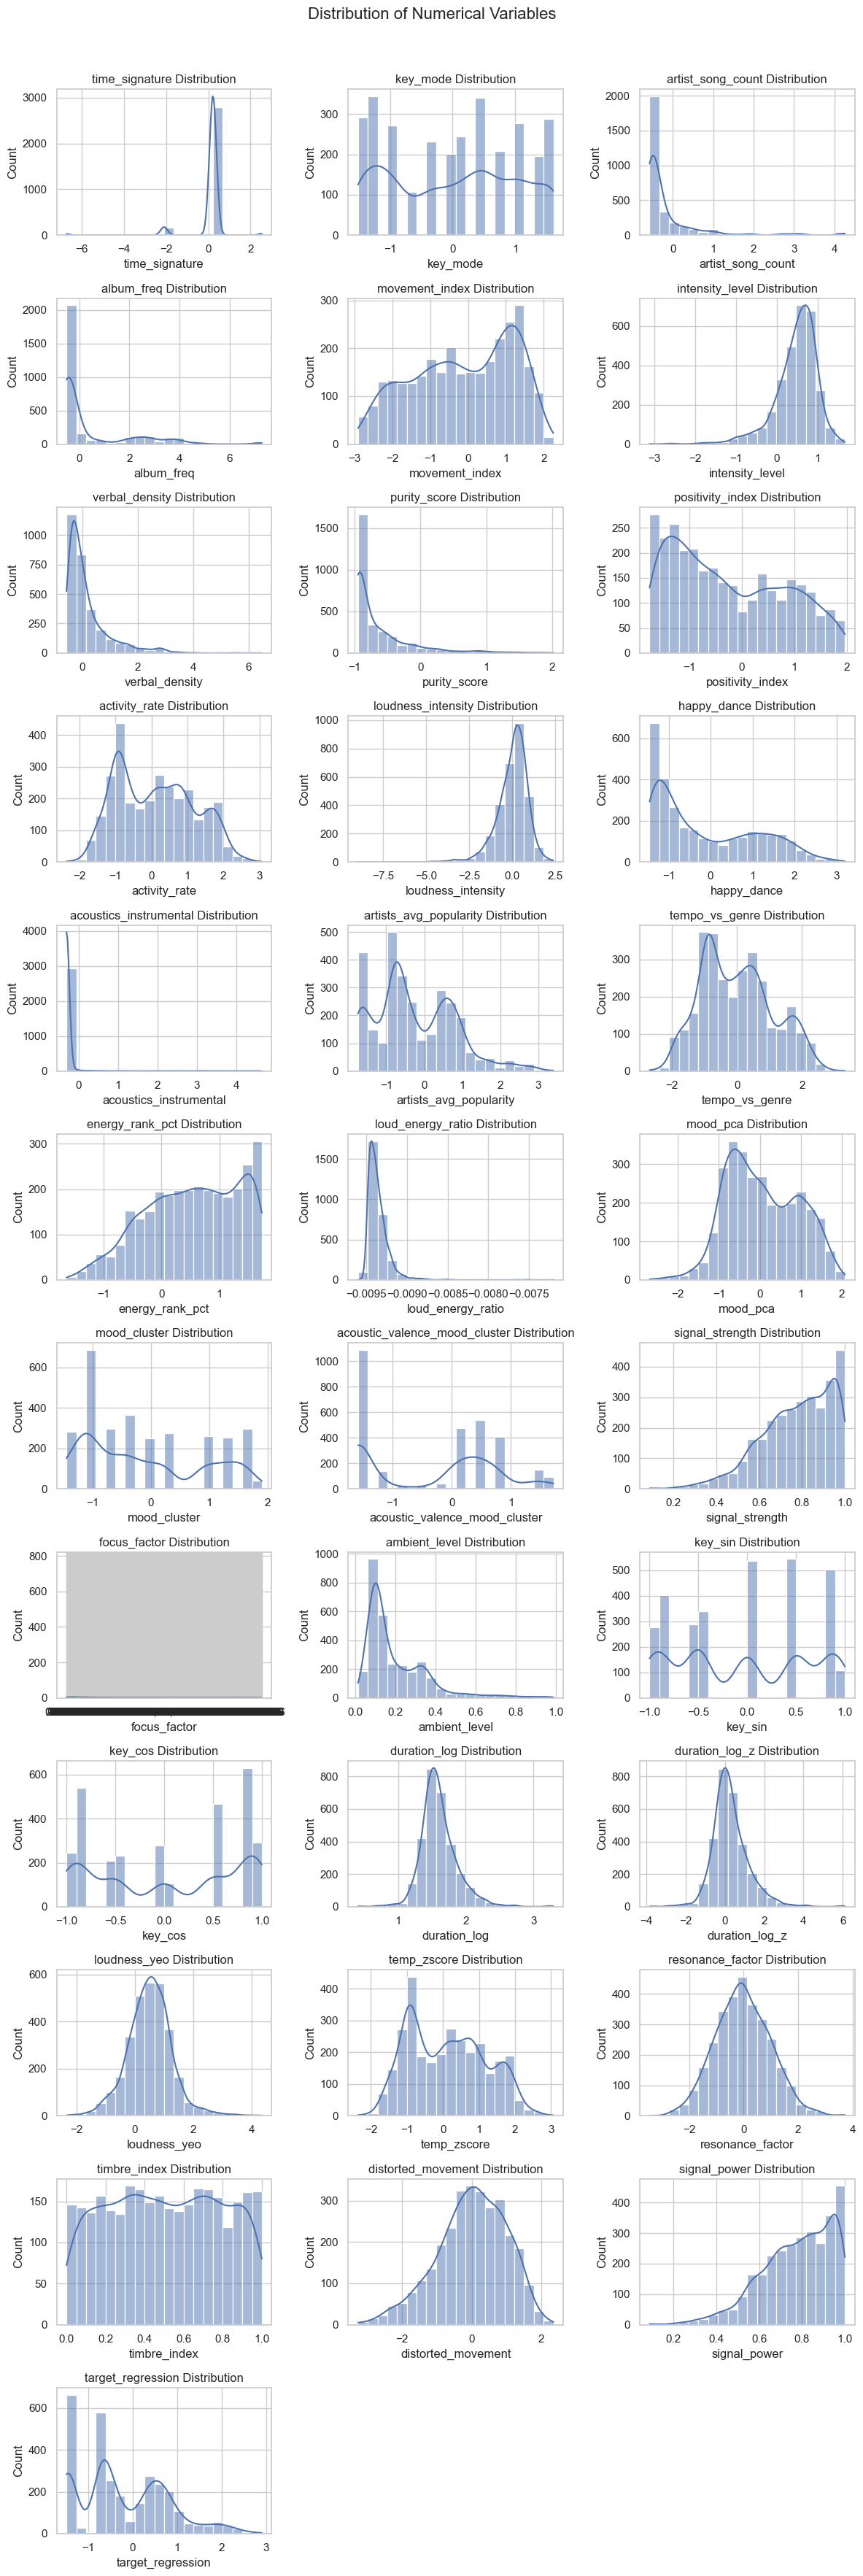

In [7]:
# Initial setup
numeric_columns = [
    'time_signature', 'key_mode', 'artist_song_count', 'album_freq', 'movement_index',
    'intensity_level', 'verbal_density', 'purity_score', 'positivity_index', 'activity_rate',
    'loudness_intensity', 'happy_dance', 'acoustics_instrumental', 'artists_avg_popularity',
    'tempo_vs_genre', 'energy_rank_pct', 'loud_energy_ratio', 'mood_pca', 'mood_cluster',
    'acoustic_valence_mood_cluster', 'signal_strength', 'focus_factor', 'ambient_level',
    'key_sin', 'key_cos', 'duration_log', 'duration_log_z', 'loudness_yeo', 'temp_zscore',
    'resonance_factor', 'timbre_index', 'distorted_movement', 'signal_power', 'target_regression'
]

# Grid setup
n = len(numeric_columns)
ncols = 3
nrows = math.ceil(n / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(4 * ncols, 3 * nrows))
fig.suptitle('Distribution of Numerical Variables', fontsize=16)

# Flatten axes
axes_flat = axes.flatten() if isinstance(axes, np.ndarray) else [axes]

# Generate histograms
for i, col in enumerate(numeric_columns):
    ax = axes_flat[i]
    sns.histplot(df[col], kde=True, bins=20, ax=ax)
    ax.set_title(f'{col} Distribution')

# Hide unused axes if any
for j in range(len(numeric_columns), len(axes_flat)):
    axes_flat[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

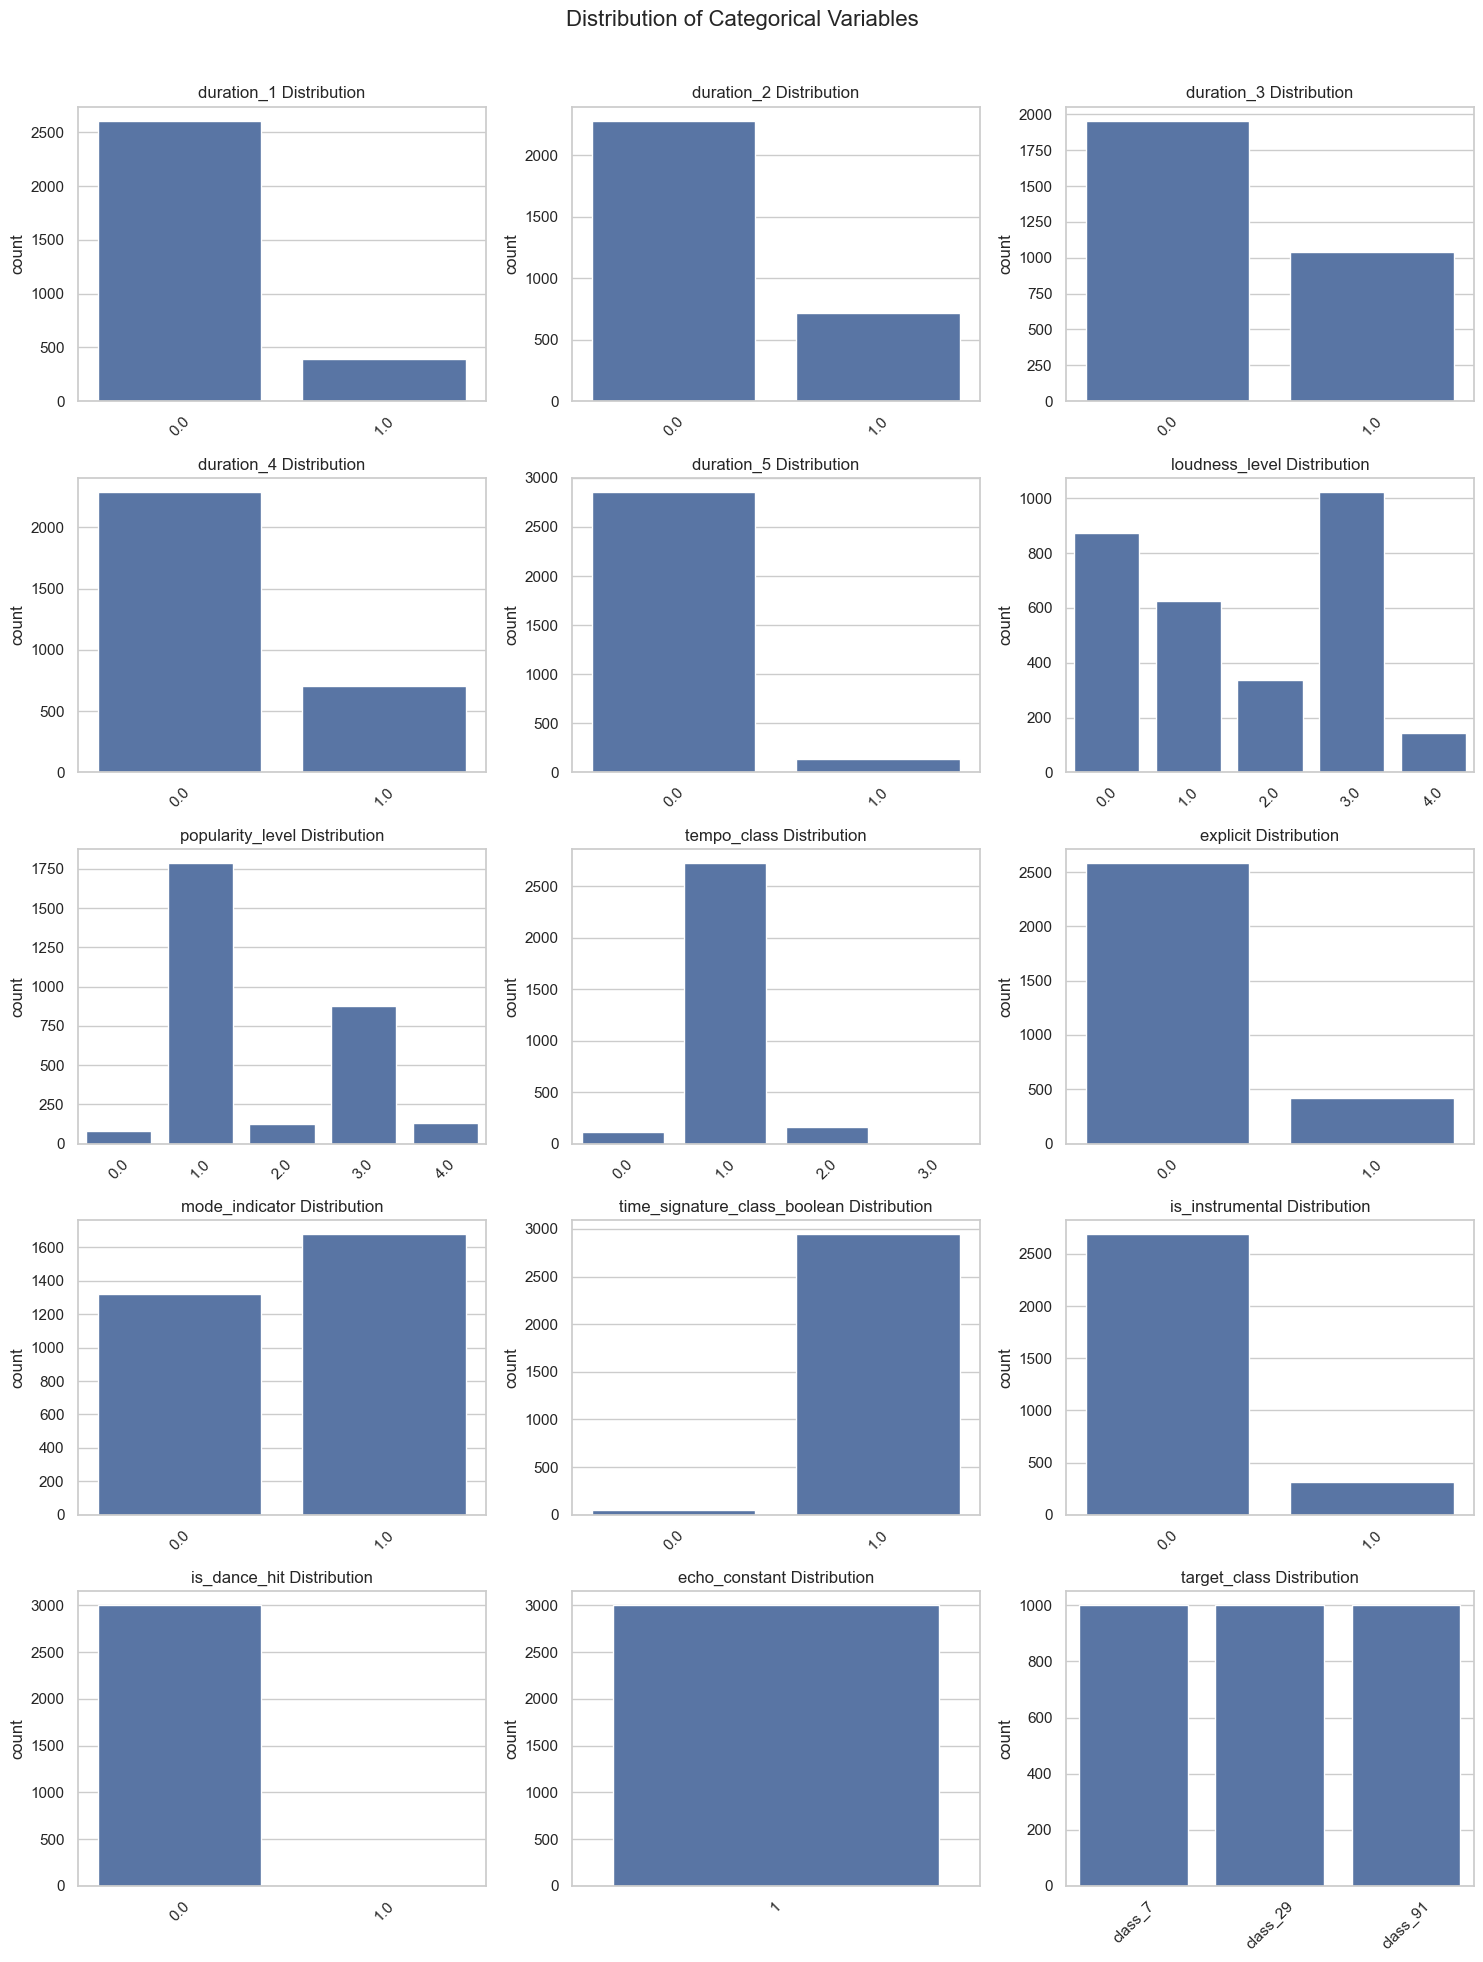

In [8]:
# Initial setup
categorical_columns = [
    'duration_1',
    'duration_2',
    'duration_3',
    'duration_4',
    'duration_5',
    'loudness_level',
    'popularity_level',
    'tempo_class',
    'explicit',
    'mode_indicator',
    'time_signature_class_boolean',
    'is_instrumental',
    'is_dance_hit',
    'echo_constant',
    'target_class'
]

# Grid setup
n_cols = 3
n_rows = math.ceil(len(categorical_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
fig.suptitle('Distribution of Categorical Variables', fontsize=16)

axes = axes.flatten()  # Flatten axes

for idx, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[idx])
    axes[idx].set_title(f'{col} Distribution')
    axes[idx].set_xlabel("")                        # Remove x labels for cleaner look if long names
    axes[idx].tick_params(axis='x', rotation=45)    # Rotate labels for readability

# Hide any unused subplots
for j in range(idx + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()



BIVARIATE ANALYSIS (Correlation between features and the different target variables)

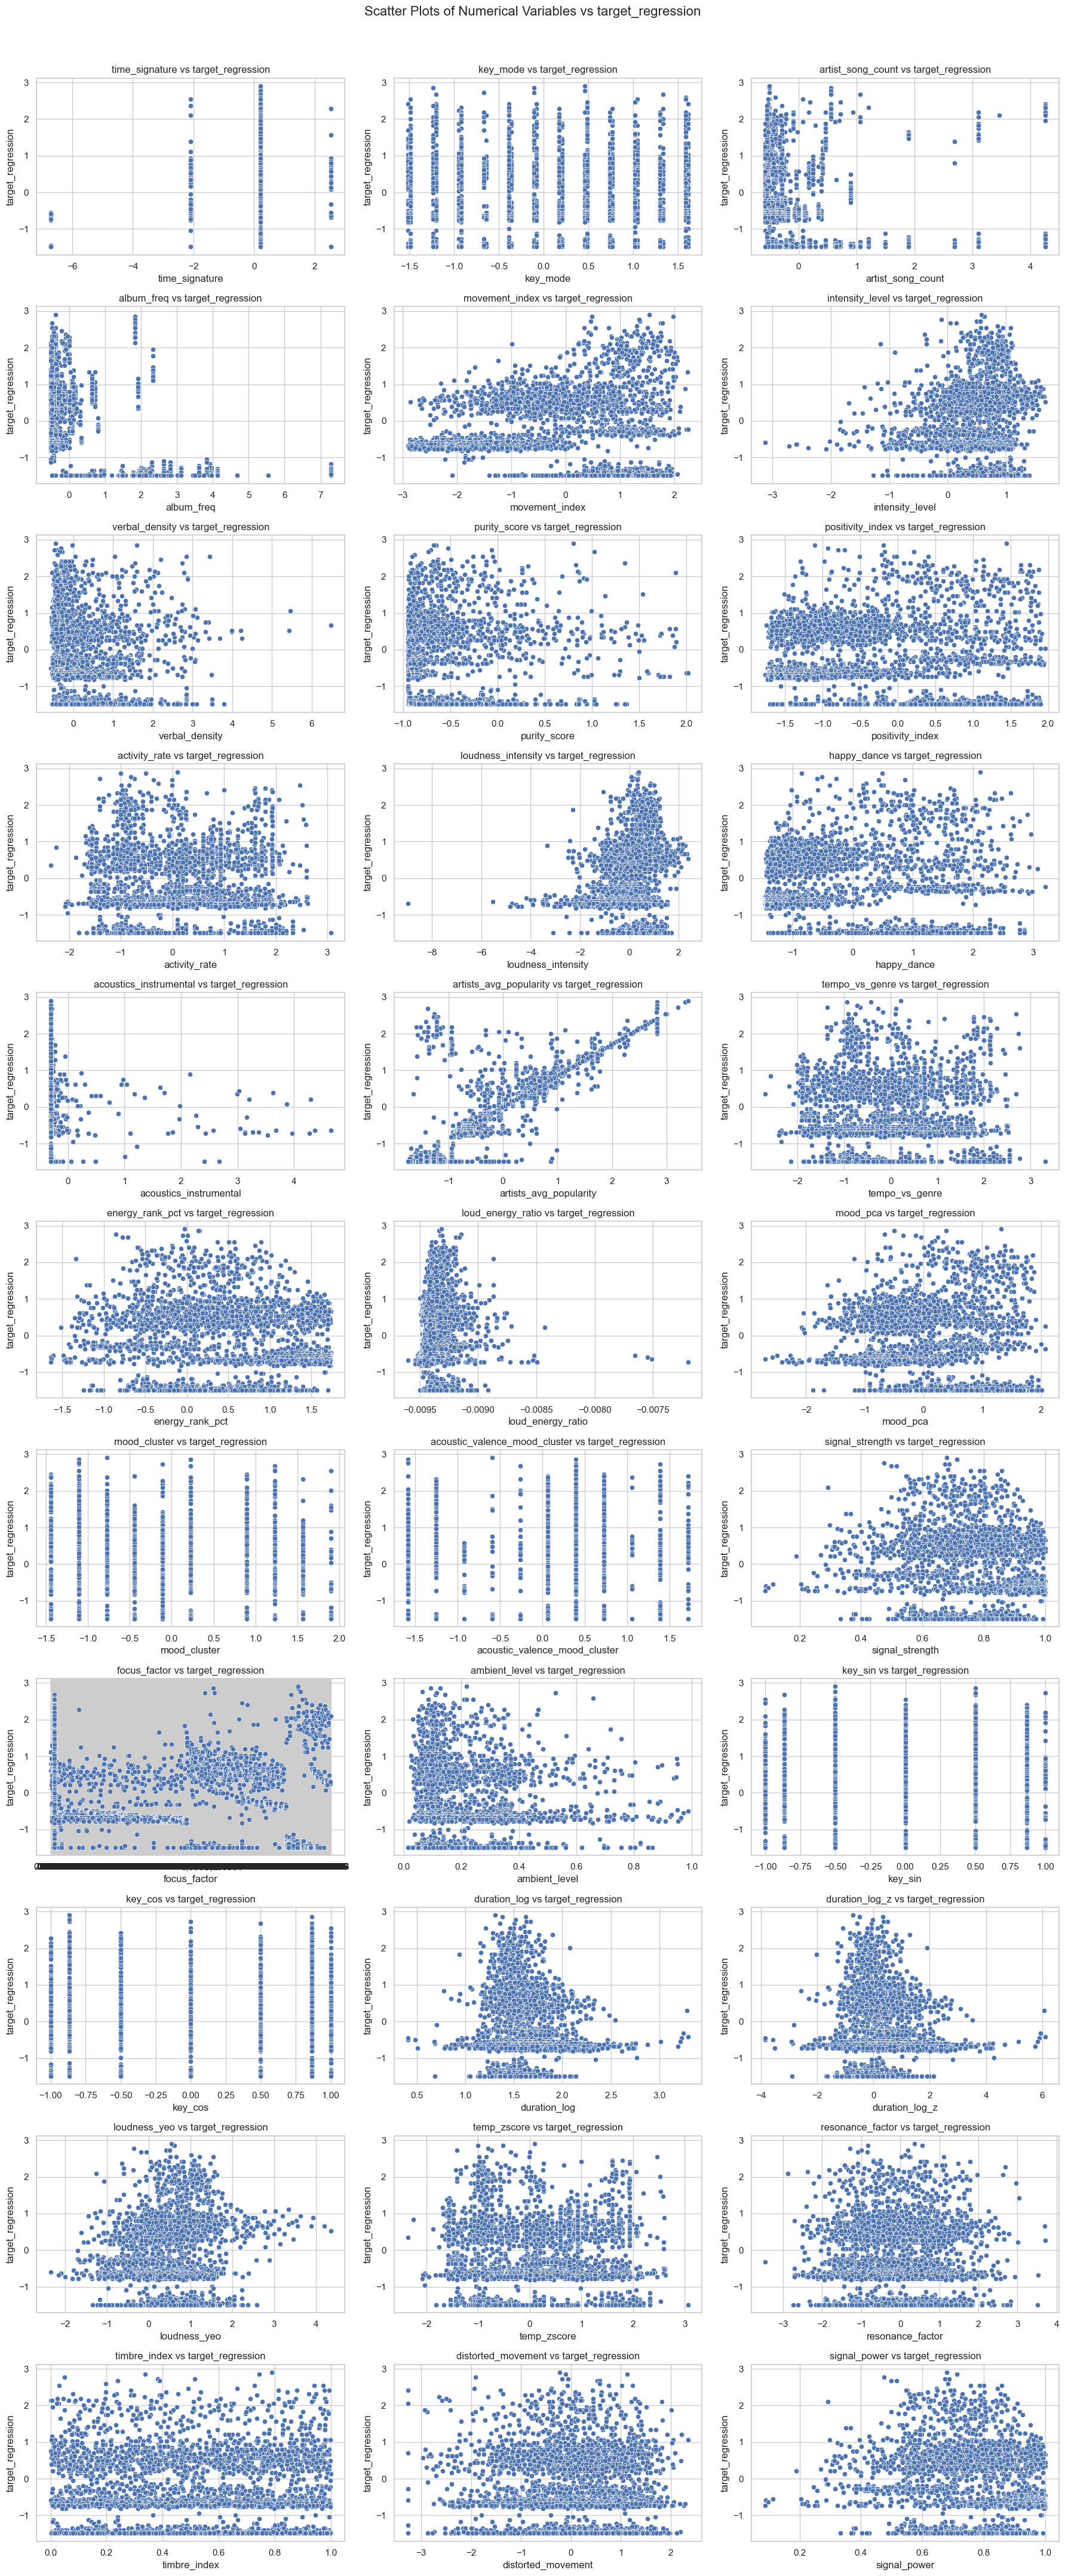

In [9]:
# Initial setup
target_column = 'target_regression'

numeric_columns = [
    'time_signature', 'key_mode', 'artist_song_count', 'album_freq', 'movement_index',
    'intensity_level', 'verbal_density', 'purity_score', 'positivity_index', 'activity_rate',
    'loudness_intensity', 'happy_dance', 'acoustics_instrumental', 'artists_avg_popularity',
    'tempo_vs_genre', 'energy_rank_pct', 'loud_energy_ratio', 'mood_pca', 'mood_cluster',
    'acoustic_valence_mood_cluster', 'signal_strength', 'focus_factor', 'ambient_level',
    'key_sin', 'key_cos', 'duration_log', 'duration_log_z', 'loudness_yeo', 'temp_zscore',
    'resonance_factor', 'timbre_index', 'distorted_movement', 'signal_power'
]

# Grid setup
n_cols = 3
n_rows = math.ceil(len(numeric_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
fig.suptitle(f'Scatter Plots of Numerical Variables vs {target_column}', fontsize=16)

axes = axes.flatten() # Flatten axes

for idx, col in enumerate(numeric_columns):
    sns.scatterplot(x=col, y=target_column, data=df, ax=axes[idx])
    axes[idx].set_title(f'{col} vs {target_column}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel(target_column)

# Hide extra subplots (if any)
for j in range(idx + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


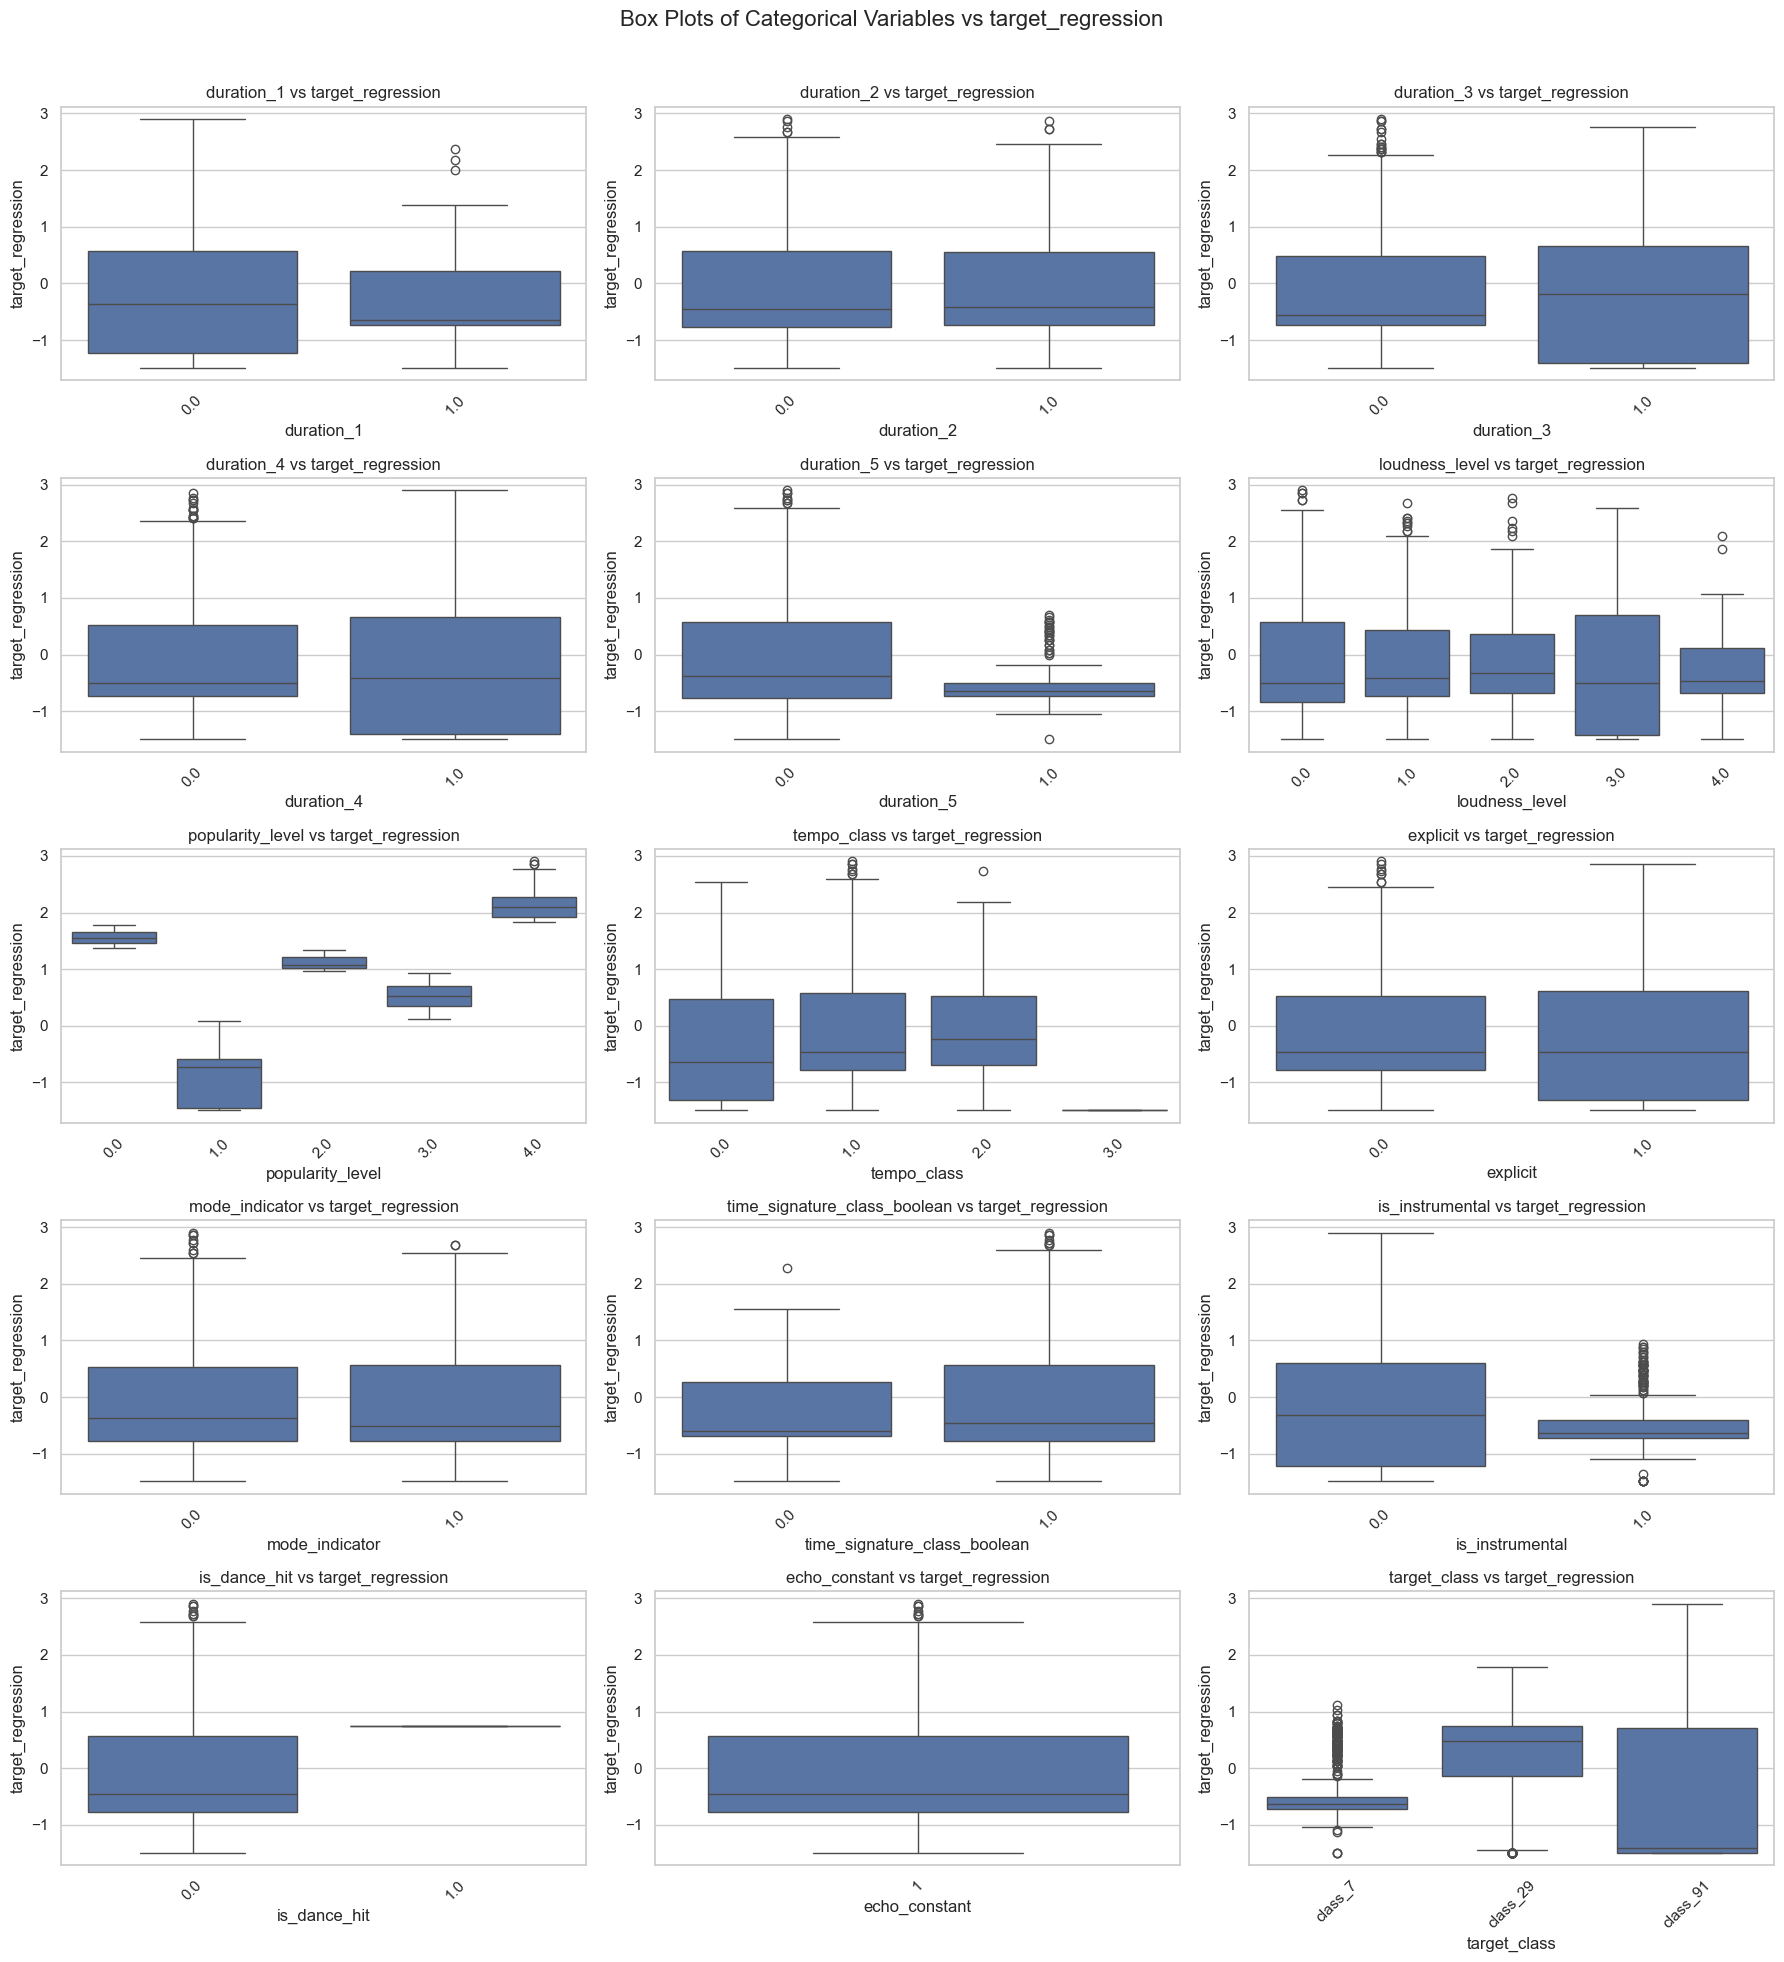

In [10]:
# Initial setup
target_column = 'target_regression'

categorical_columns = [
    'duration_1', 'duration_2', 'duration_3', 'duration_4', 'duration_5',
    'loudness_level', 'popularity_level', 'tempo_class', 'explicit',
    'mode_indicator', 'time_signature_class_boolean', 'is_instrumental',
    'is_dance_hit', 'echo_constant', 'target_class'
]

# Grid setup
n_cols = 3
n_rows = math.ceil(len(categorical_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
fig.suptitle(f'Box Plots of Categorical Variables vs {target_column}', fontsize=16)

axes = axes.flatten() # Flatten axes

for idx, col in enumerate(categorical_columns):
    sns.boxplot(x=col, y=target_column, data=df, ax=axes[idx])
    axes[idx].set_title(f'{col} vs {target_column}')
    axes[idx].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(idx + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


# 3 Methods Application - Regression

Best Feature for Regression

Top 10 features by R2 score:
                   Feature       MAE       MSE        R2
21  artists_avg_popularity  0.208298  0.244732  0.752696
6         popularity_level  0.455895  0.489721  0.505132
11              album_freq  0.688911  0.707384  0.285181
10       artist_song_count  0.804022  0.941778  0.048323
18      loudness_intensity  0.818335  0.973662  0.016104
23         energy_rank_pct  0.822498  0.973928  0.015835
29         signal_strength  0.825542  0.975369  0.014378
46            signal_power  0.825542  0.975369  0.014378
31            focus_factor  0.822217  0.977629  0.012095
24       loud_energy_ratio  0.832881  0.980671  0.009021


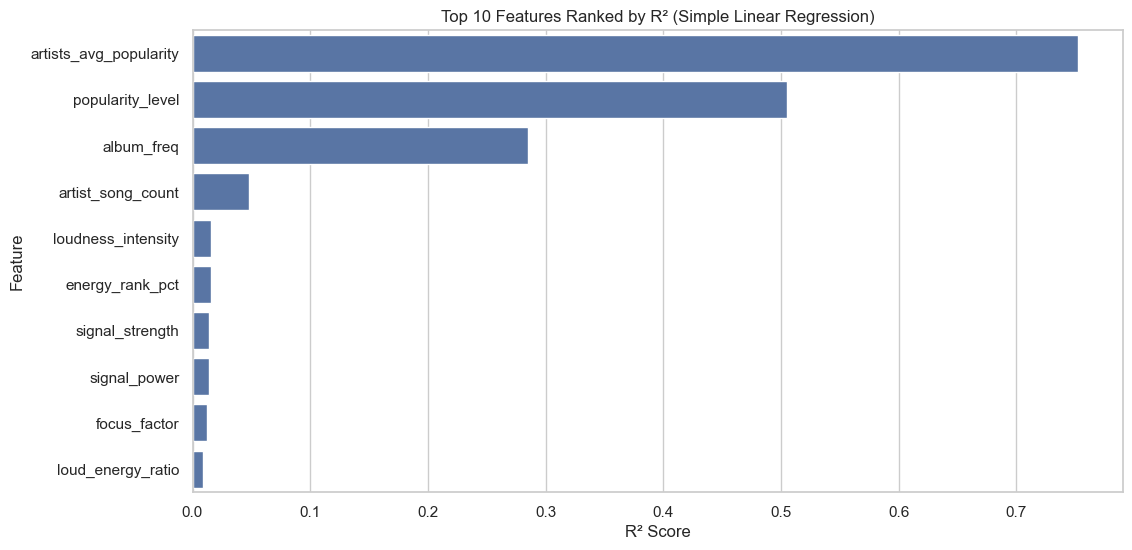

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setup

for col in df.columns:
    df[col] = df[col].astype(str).str.replace(',', '.', regex=False)

target_column = 'target_regression'  # Target variable
features = [
    'duration_1','duration_2','duration_3','duration_4','duration_5','loudness_level',
    'popularity_level','tempo_class','time_signature','key_mode','artist_song_count',
    'album_freq','movement_index','intensity_level','verbal_density','purity_score',
    'positivity_index','activity_rate','loudness_intensity','happy_dance',
    'acoustics_instrumental','artists_avg_popularity','tempo_vs_genre','energy_rank_pct',
    'loud_energy_ratio','mood_pca','mood_cluster','acoustic_valence_mood_cluster',
    'explicit','signal_strength','mode_indicator','focus_factor','ambient_level',
    'key_sin','key_cos','duration_log','duration_log_z','time_signature_class_boolean',
    'loudness_yeo','is_instrumental','is_dance_hit','temp_zscore','resonance_factor',
    'timbre_index','echo_constant','distorted_movement','signal_power'
]

results = []

# Loop Through Features and Fit SLR

for feature in features:
    X = df[[feature]]
    y = df[[target_column]]

    lr = LinearRegression()
    lr.fit(X, y)
    pred = lr.predict(X)

    mae = mean_absolute_error(y, pred)
    mse = mean_squared_error(y, pred)
    r2 = r2_score(y, pred)

    results.append([feature, mae, mse, r2])

# Convert to DataFrame and Sort

results_df = pd.DataFrame(results, columns=['Feature', 'MAE', 'MSE', 'R2'])
results_df = results_df.sort_values(by='R2', ascending=False)
print("Top 10 features by R2 score:")
print(results_df.head(10))

# Plot R² Bar Chart

plt.figure(figsize=(12, 6))
sns.barplot(x='R2', y='Feature', data=results_df.head(10))  # Plot top 10
plt.title('Top 10 Features Ranked by R² (Simple Linear Regression)')
plt.xlabel('R² Score')
plt.ylabel('Feature')
plt.show()


Simple Linear Regression

In [ ]:
# Replace commas with dots and convert to float
df['artists_avg_popularity'] = df['artists_avg_popularity'].astype(str).str.replace(',', '.', regex=False)
df['target_regression'] = df['target_regression'].astype(str).str.replace(',', '.', regex=False)

# Convert to numeric
df['artists_avg_popularity'] = pd.to_numeric(df['artists_avg_popularity'], errors='coerce')
df['target_regression'] = pd.to_numeric(df['target_regression'], errors='coerce')

x=df[['artists_avg_popularity']]
y=df[['target_regression']]
lr = LinearRegression()
lr_model = lr.fit(x, y)

predictions = lr_model.predict(x)
df['slr_result'] = predictions

slr_error = y - predictions
df['slr_error'] = slr_error

print ('Slope: ', lr_model.coef_)
print ('Intercept: ',lr_model.intercept_)

print("Mean absolute error: %.2f" % np.mean(np.absolute(predictions - y.values)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predictions - y.values) ** 2))
print("R2-score: %.2f" % r2_score(y.values , predictions) )

Slope:  [[0.8371356]]
Intercept:  [0.01743991]
Mean absolute error: 0.21
Residual sum of squares (MSE): 0.24
R2-score: 0.75


C:\Users\diogo\AppData\Local\Temp\ipykernel_20284\1166551315.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, hist=False, color="g", label="Actual Values",ax=axes[1])
C:\Users\diogo\AppData\Local\Temp\ipykernel_20284\1166551315.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

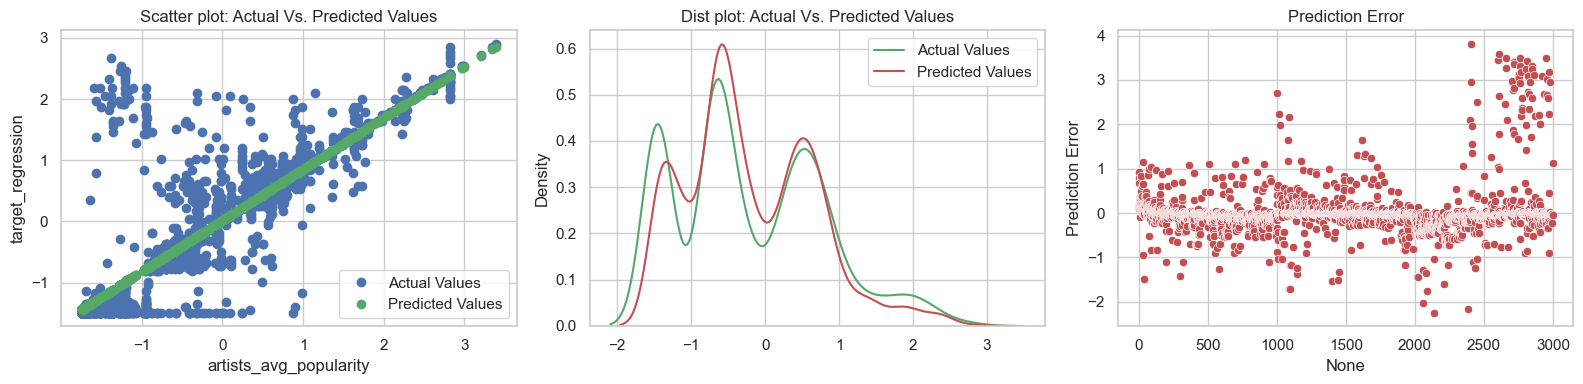

In [13]:
fig, axes =plt.subplots(1,3, figsize=(16,4))
axes[0].plot(x['artists_avg_popularity'], y,'bo',label='Actual Values')
axes[0].plot(x['artists_avg_popularity'], predictions,'go',label='Predicted Values')
axes[0].set_title("Scatter plot: Actual Vs. Predicted Values")
axes[0].set_xlabel("artists_avg_popularity")
axes[0].set_ylabel("target_regression")
axes[0].legend()

sns.distplot(y, hist=False, color="g", label="Actual Values",ax=axes[1])
sns.distplot(predictions, hist=False, color="r", label="Predicted Values" , ax=axes[1])
axes[1].set_title("Dist plot: Actual Vs. Predicted Values")
axes[1].legend()

sns.scatterplot(x=y.index,y='slr_error',data=df,color="r", ax=axes[2])
axes[2].set_title("Prediction Error")
axes[2].set_ylabel("Prediction Error")

fig.tight_layout()

Based on the analysis performed across all features, the variable artists_avg_popularity achieved the highest R² score.

This indicates that artists_avg_popularity is the best single predictor of target_regression, explaining the largest proportion of its variance among all tested features.

In other words, the average popularity of an artist has the strongest linear relationship with the target regression score, making it the most influential variable in this simple predictive model.

# 4 Methods Application - Classification

Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Setup
target_column = 'target_class'

# Select potential predictive features (you can adjust or reduce this list)
features = [
    'duration_1','duration_2','duration_3','duration_4','duration_5',
    'loudness_level','popularity_level','tempo_class','time_signature',
    'key_mode','artist_song_count','album_freq','movement_index',
    'intensity_level','verbal_density','purity_score','positivity_index',
    'activity_rate','loudness_intensity','happy_dance','acoustics_instrumental',
    'artists_avg_popularity','tempo_vs_genre','energy_rank_pct','loud_energy_ratio',
    'mood_pca','mood_cluster','acoustic_valence_mood_cluster','explicit',
    'signal_strength','mode_indicator','focus_factor','ambient_level','key_sin',
    'key_cos','duration_log','duration_log_z','time_signature_class_boolean',
    'loudness_yeo','is_instrumental','is_dance_hit','temp_zscore','resonance_factor',
    'timbre_index','echo_constant','distorted_movement','signal_power'
]

# Step 2: Data Cleaning and Encoding
# Replace commas with dots for numeric conversion
for col in features + [target_column]:
    df[col] = df[col].astype(str).str.replace(',', '.', regex=False)

# Convert to numeric when possible
for col in features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing data
df = df.dropna(subset=features + [target_column])

# Encode categorical target if necessary
le = LabelEncoder()
df[target_column] = le.fit_transform(df[target_column])

# Step 3: Split and Standardize
X = df[features]
y = df[target_column]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train Logistic Regression Model
logr = LogisticRegression(max_iter=1000)
logr.fit(X_scaled, y)

# Predictions
y_pred = logr.predict(X_scaled)

# Step 5: Model Evaluation
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y, y_pred))
print("\nClassification Report:")
print(classification_report(y, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y, y_pred))


Logistic Regression Performance:
Accuracy: 0.9763333333333334

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1000
           1       0.96      0.97      0.96      1000
           2       1.00      1.00      1.00      1000

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000


Confusion Matrix:
[[962  38   0]
 [ 32 968   0]
 [  0   1 999]]


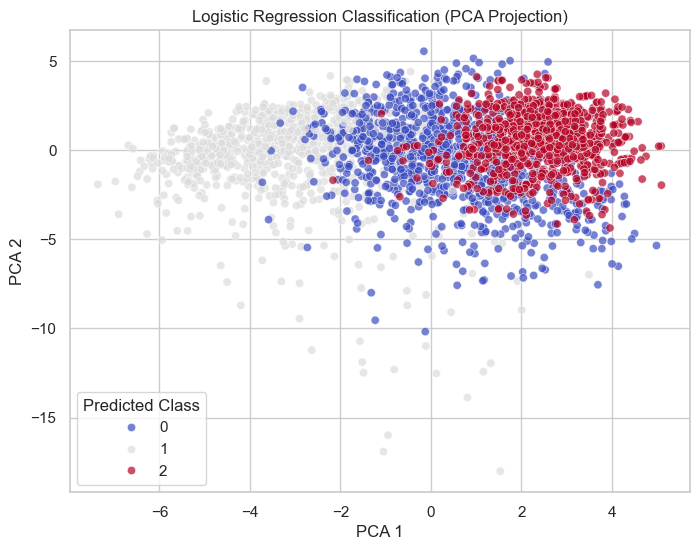

In [19]:
# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_pred, palette='coolwarm', alpha=0.7)
plt.title('Logistic Regression Classification (PCA Projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Predicted Class')
plt.show()